In [23]:
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
transactions = pd.read_csv('/content/Transactions.csv')
products = pd.read_csv('/content/Products.csv')
customers = pd.read_csv('/content/Customers.csv')

In [25]:
print("Missing Values:")
print("Missing Values:")
print("Transactions:", transactions.isnull().sum())
print("Products:", products.isnull().sum())
print("Customers:", customers.isnull().sum())

Missing Values:
Missing Values:
Transactions: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
Products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Customers: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [26]:
print("Duplicate Rows:")
print("Transactions:", transactions.duplicated().sum())
print("Products:", products.duplicated().sum())
print("Customers:", customers.duplicated().sum())

Duplicate Rows:
Transactions: 0
Products: 0
Customers: 0


In [27]:
print("\nData Types:")
print("Transactions:", transactions.dtypes)
print("Products:", products.dtypes)
print("Customers:", customers.dtypes)


Data Types:
Transactions: TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
dtype: object
Products: ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object
Customers: CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object


In [28]:
print("\nDescriptive Statistics:")
print("Transactions:", transactions.describe())
print("Products:", products.describe())
print("Customers:", customers.describe())


Descriptive Statistics:
Transactions:           Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000
Products:             Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
Customers:        CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3


In [29]:
print("\nShape of DataFrames:")
print("Transactions:", transactions.shape)
print("Products:", products.shape)
print("Customers:", customers.shape)


Shape of DataFrames:
Transactions: (1000, 7)
Products: (100, 4)
Customers: (200, 4)


In [30]:
transactions_head = transactions.head()
products_head = products.head()
customers_head = customers.head()
print(transactions_head)
print(products_head)
print(customers_head)

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawre

In [31]:
transactions_info = transactions.info()
products_info = products.info()
customers_info = customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pan

In [32]:
customers['Region'] = customers['Region'].astype('category')
products['Category'] = products['Category'].astype('category')


In [33]:
merged_1 = transactions.merge(products, on="ProductID").merge(customers, on="CustomerID")
print(merged_1.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x                      ProductName     Category  Price_y  \
0      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
1      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
2      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
3      601.36   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
4      902.04   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   

      CustomerName         Region  SignupDate  
0   Andrea Jenkins         Europe  202

In [34]:
merged_1["TransactionDate"] = pd.to_datetime(merged_1["TransactionDate"])
merged_1["SignupDate"] = pd.to_datetime(merged_1["SignupDate"])

In [35]:
top_top_selling_products = merged_1.groupby("ProductName")["TotalValue"].sum().sort_values(ascending=False).head(5)
print(top_top_selling_products)

ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64


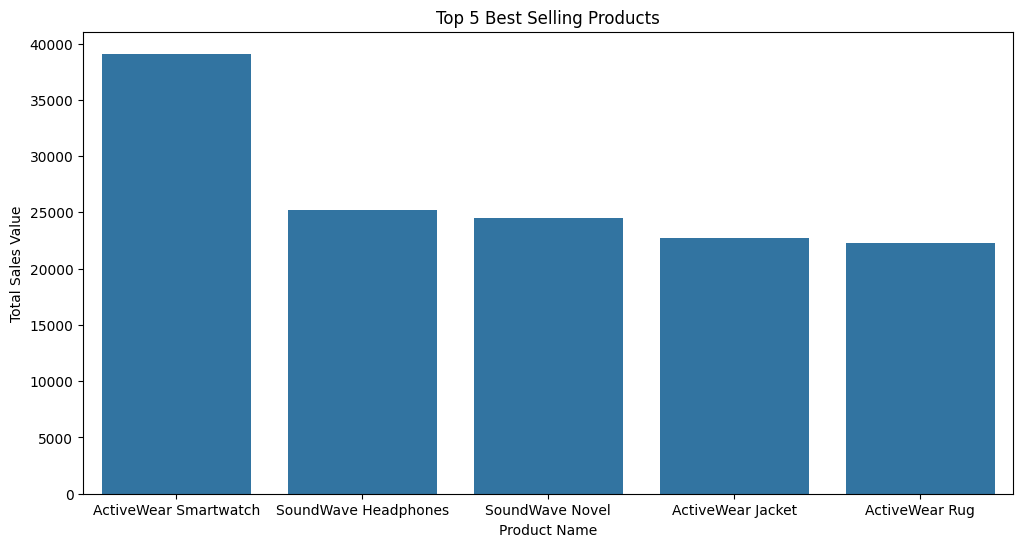

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_top_selling_products.index, y=top_top_selling_products.values)
plt.xlabel("Product Name")
plt.ylabel("Total Sales Value")
plt.title("Top 5 Best Selling Products")
plt.show()

In [37]:
monthly_sales_trends = merged_1.groupby(merged_1["TransactionDate"].dt.to_period("M"))["TotalValue"].sum()
print(monthly_sales_trends)

TransactionDate
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


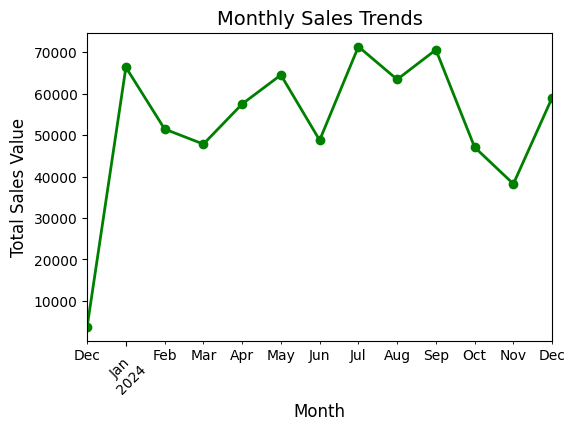

In [38]:
plt.figure(figsize=(6, 4))
monthly_sales_trends.plot(kind='line', color='green', marker='o', linestyle='-', linewidth=2, markersize=6)
plt.title('Monthly Sales Trends', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales Value', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [39]:
top_categories = merged_1.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
print(top_categories)

Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


<ipython-input-39-e28efd37334b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_categories = merged_1.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)


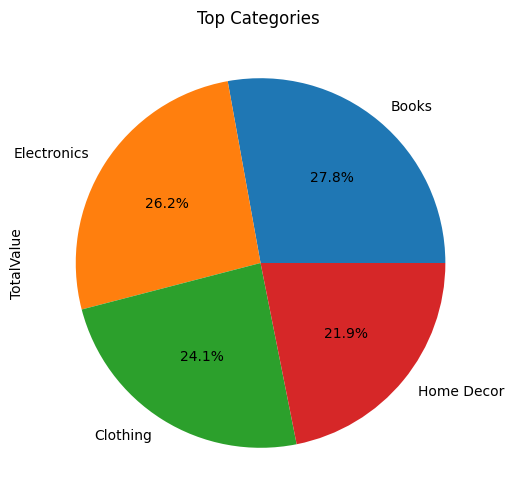

In [40]:
plt.figure(figsize=(10, 6))
top_categories.plot(kind='pie', autopct='%1.1f%%')
plt.title('Top Categories ')
plt.show()

In [41]:
top_performing_regions = merged_1.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
print(top_performing_regions)

Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


<ipython-input-41-0894922c2c0d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_performing_regions = merged_1.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)


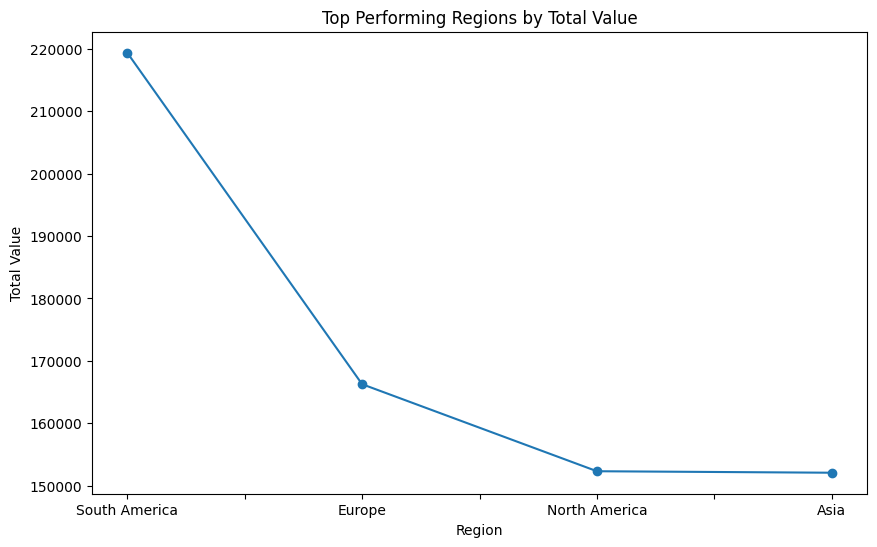

In [42]:
plt.figure(figsize=(10, 6))
top_performing_regions.plot(kind='line', marker='o')
plt.title('Top Performing Regions by Total Value')
plt.xlabel('Region')
plt.ylabel('Total Value')
plt.show()

In [43]:
top_spending_customers = merged_1.groupby("CustomerID")["TotalValue"].sum().sort_values(ascending=False).head(5)
print(top_spending_customers)

CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64


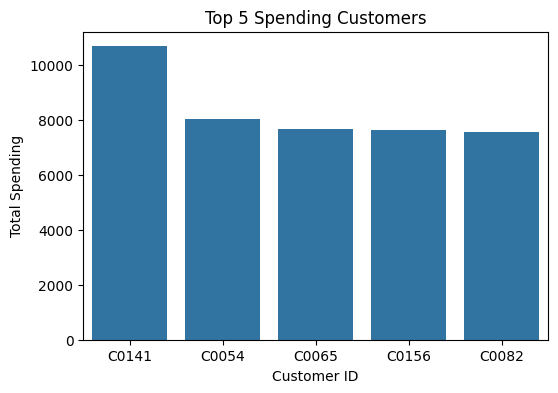

In [44]:
plt.figure(figsize=(6, 4))
sns.barplot(x=top_spending_customers.index, y=top_spending_customers.values)
plt.xlabel("Customer ID")
plt.ylabel("Total Spending")
plt.title("Top 5 Spending Customers")
plt.show()
